In [82]:
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open('jk.jpg')
im.size

(318, 116)

In [83]:
import numpy as np
im_pillow = np.asarray(im)
im_pillow.shape


(116, 318, 3)

In [84]:
import cv2
im_cv2 = cv2.imread('jk.jpg')
type(im_cv2)
im_cv2.shape

(116, 318, 3)

### Pillow读入通道的顺序是R、G、B
### OpenCV读入后顺序是B、G、R

In [85]:
im_pillow[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [86]:
zeros = np.zeros((im_pillow.shape[0],im_pillow.shape[1],1))
zeros.shape

(116, 318, 1)

In [87]:
im_pillow_c1 = im_pillow[:,:,0]
im_pillow_c2 = im_pillow[:,:,1]
im_pillow_c3 = im_pillow[:,:,2]


In [88]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1,zeros,zeros),axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
im_pillow_c1.shape

In [ ]:
zeros.shape

### np.newaxis

In [91]:
im_pillow_c1 = im_pillow_c1[:,:,np.newaxis]
im_pillow_c1.shape

(116, 318, 1)

In [93]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1,zeros,zeros),axis=2)

In [94]:
im_pillow_c1_3ch

array([[[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        ...,
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.]],

       [[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        ...,
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.]],

       [[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        ...,
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.]],

       ...,

       [[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        ...,
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.]],

       [[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        ...,
        [255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,   0.,   0.]],

       [[255.,   0.,   0.],
        [255.,   0.,   0.],
        [255.,  

### 直接赋值

In [95]:
im_pillow_c2_3ch = np.zeros(im_pillow.shape)

In [96]:
im_pillow_c2_3ch[:,:,1] = im_pillow_c2

In [97]:
im_pillow_c3_3ch = np.zeros(im_pillow.shape)

In [98]:
im_pillow_c3_3ch[:,:,2] = im_pillow_c3

(-0.5, 317.5, 115.5, -0.5)

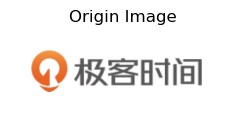

In [99]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')

(-0.5, 317.5, 115.5, -0.5)

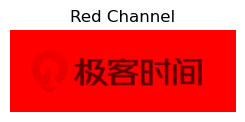

In [100]:
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')

(-0.5, 317.5, 115.5, -0.5)

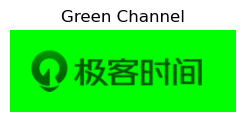

In [101]:
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')

(-0.5, 317.5, 115.5, -0.5)

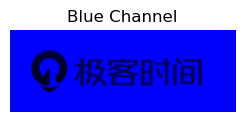

In [102]:
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')

In [105]:
plt.savefig('./rgb_pillow.png', dpi=150)

<Figure size 640x480 with 0 Axes>

### 深拷贝（副本）与浅拷贝（视图）

In [106]:
from PIL import Image
import numpy as np

im = Image.open('jk.jpg')
im_pillow = np.asarray(im)
im_pillow[:,:,1:] = 0

ValueError: assignment destination is read-only

### np.array() 属于深拷贝，np.asarray() 则是浅拷贝

In [113]:
a = np.arange(6)
print(a.shape)
print(a)

(6,)
[0 1 2 3 4 5]


### 浅拷贝或称视图，指的是与原数组共享数据的数组
### 视图通过`view`创建

In [109]:
b = a.view()
print(b.shape)

(6,)


In [111]:
b.shape = (2,3)
print(b)

[[0 1 2]
 [3 4 5]]


In [112]:
b[0,0]=111
print(a)

[111   1   2   3   4   5]


### 深拷贝又称为副本，完全复制原有数组
## 使用`copy`方法

In [115]:
im_pillow = np.array(im)
im_pillow[:,:,1:]=0
im_pillow

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

![image-20230905165849517](https://cdn.jsdelivr.net/gh/Hyeonwuu/Image/image-20230905165849517.png)

# 每日一练

In [122]:
scores = np.random.rand(256,256,2)
scores[:,:,1] = 1 - scores[:,:,0]
mask = np.ones((scores.shape[0],scores.shape[1],1),dtype=np.uint8)
mask.shape

mask[scores[:,:,0] > scores[:,:,1]] = 0

In [131]:
print(scores[0,1,0])
print(scores[0,1,1])

0.20059632050367182
0.7994036794963282


In [130]:
mask[0,1,0]

1